In [1]:
# Exploring the book ratings dataset

In [17]:
%matplotlib inline
import pandas as pd
import re
import seaborn as sns
path='/home/kliton/Documents/Springboard/Capstone/BookRatings/BX-CSV-Dump/'
#import urllib3;
#from bs4 import BeautifulSoup
#import certifi


Loading the dataset:

In [3]:
import csv
bx_users = pd.read_csv(path+'BX-Users.csv', quotechar='"', 
                       na_values='NULL', quoting=csv.QUOTE_ALL,  
                       sep=";", encoding='iso-8859-1' )
bx_books = pd.read_csv(path+'BX-Books.csv', quotechar='"', na_values='NULL', 
                       quoting=csv.QUOTE_ALL,  sep=";", encoding='iso-8859-1', escapechar='\\')
bx_ratings = pd.read_csv(path+'BX-Book-Ratings.csv', quotechar='"', na_values='NULL', quoting=csv.QUOTE_ALL,  sep=";", encoding='iso-8859-1' )

In [12]:
path2 = '/home/kliton/Documents/Springboard/Capstone/BookRatings/' 
BookInfo = pd.read_csv(path2+'BookInfoClean.csv')

/home/kliton/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,6,48,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Exploring the data

In [13]:
BookInfo.head()


,Unnamed: 0,authors,by_statement,contributions,contributors,copyright_date,coverimage,covers,description,description.type,...,translation_of,uri_descriptions,uris,url,weight,work_title,work_titles,works,isbn10,average_rating
0,0,NaN,edited by Stephanie Newell.,"['Newell, Stephanie, 1968-']",NaN,NaN,NaN,"[4872475, 4872461, 3858348, 3858328]",NaN,NaN,...,NaN,"['Publisher description', 'Table of contents']",['http://www.loc.gov/catdir/description/hol055...,['http://www.loc.gov/catdir/description/hol055...,NaN,NaN,NaN,NaN,"['1856494497', '1856494500']",3.00
1,1,[{'key': '/authors/OL230045A'}],Mario Bencastro.,NaN,NaN,NaN,NaN,[1882676],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL1919075W'}],['1558851941'],3.80
2,3,[{'key': '/authors/OL244070A'}],by Robb Armstrong.,NaN,NaN,NaN,NaN,"[3857941, 3857863]",NaN,/type/text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL2021805W'}],"['0060275278', '0064420477']",4.00
3,4,[{'key': '/authors/OL24054A'}],Sandra Belton.,NaN,NaN,NaN,NaN,[3857889],NaN,/type/text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL16070305W'}],['0689808461'],3.57
4,5,[{'key': '/authors/OL18073A'}],by Robert Kraus ; pictures by Jose Aruego & Ar...,"['Aruego, Jose, ill.', 'Dewey, Ariane, ill.']",NaN,NaN,NaN,"[1065268, 24175]",NaN,/type/text,...,NaN,['Publisher description'],['http://www.loc.gov/catdir/description/hc041/...,['http://www.loc.gov/catdir/description/hc041/...,NaN,NaN,NaN,[{'key': '/works/OL407762W'}],"['0060262931', '006026294X']",3.47


In [19]:
BookInfo.columns

Index(['Unnamed: 0', 'authors', 'by_statement', 'contributions',
       'contributors', 'copyright_date', 'coverimage', 'covers', 'description',
       'description.type', 'description.value', 'dewey_decimal_class',
       'edition_name', 'first_sentence.type', 'first_sentence.value',
       'full_title', 'genres', 'ia_box_id', 'ia_loaded_id', 'isbn_10',
       'isbn_13', 'isbn_invalid', 'key', 'languages', 'latest_revision',
       'lc_classifications', 'lccn', 'links', 'location', 'notes',
       'notes.type', 'notes.value', 'number_of_pages', 'ocaid', 'oclc_number',
       'oclc_numbers', 'other_titles', 'pagination', 'physical_dimensions',
       'physical_format', 'publish_country', 'publish_date', 'publish_places',
       'publishers', 'revision', 'series', 'source_records', 'subject_place',
       'subject_places', 'subject_time', 'subject_times', 'subjects',
       'subtitle', 'table_of_contents', 'title', 'title_prefix',
       'translated_from', 'translation_of', 'uri_descrip

In [81]:
BnotNull = BookInfo[BookInfo.columns[1:65]].notnull()
newDF = pd.DataFrame()
for i in BnotNull.columns:
    newDF = pd.DataFrame.append(newDF, BnotNull[i].value_counts().sort_index()) #.pivot_table(index=BnotNull.columns, aggfunc=pd.Series.value_counts)
newDF.fillna(0,  inplace=True)
newDF['Total'] = newDF[0]+newDF[1]
newDF['Category']=newDF.index
newDF['Empty'] = newDF[0]
newDF

,False,True,Total,Category,Empty
authors,789.0,11401.0,12190.0,authors,789.0
by_statement,654.0,11536.0,12190.0,by_statement,654.0
contributions,8592.0,3598.0,12190.0,contributions,8592.0
contributors,12173.0,17.0,12190.0,contributors,12173.0
copyright_date,12170.0,20.0,12190.0,copyright_date,12170.0
coverimage,12188.0,2.0,12190.0,coverimage,12188.0
covers,5250.0,6940.0,12190.0,covers,5250.0
description,12145.0,45.0,12190.0,description,12145.0
description.type,9800.0,2390.0,12190.0,description.type,9800.0
description.value,9800.0,2390.0,12190.0,description.value,9800.0


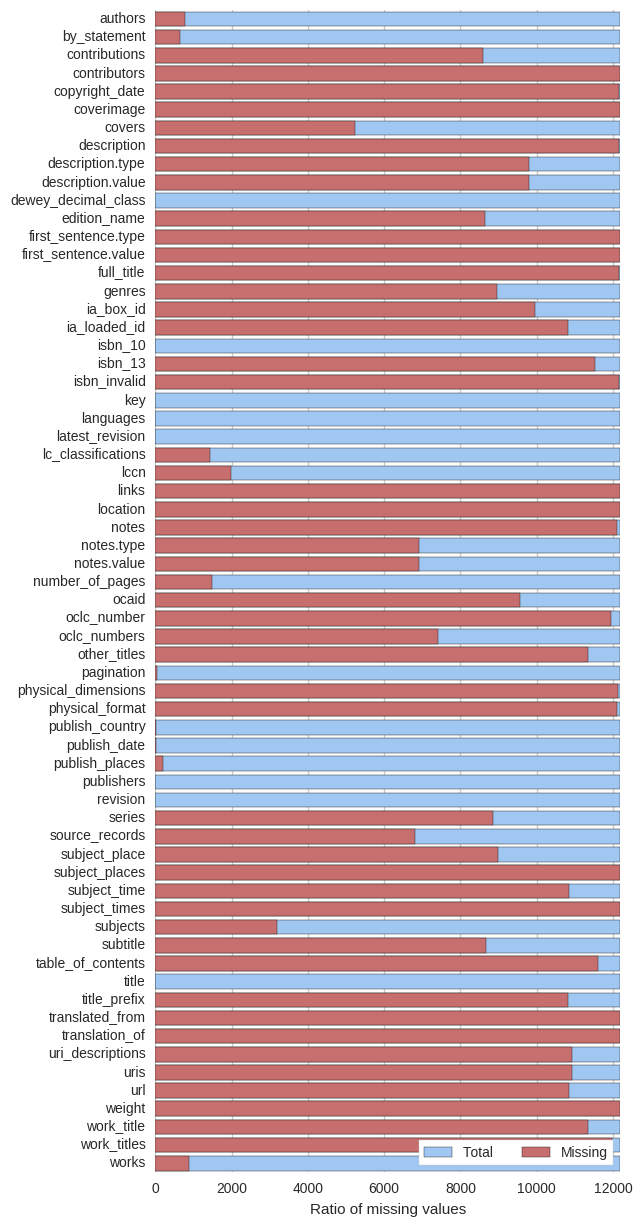

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Category", data=newDF,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Empty", y="Category", data=newDF,
            label="Missing", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 12190), ylabel="",
       xlabel="Ratio of missing values")
sns.despine(left=True, bottom=True)

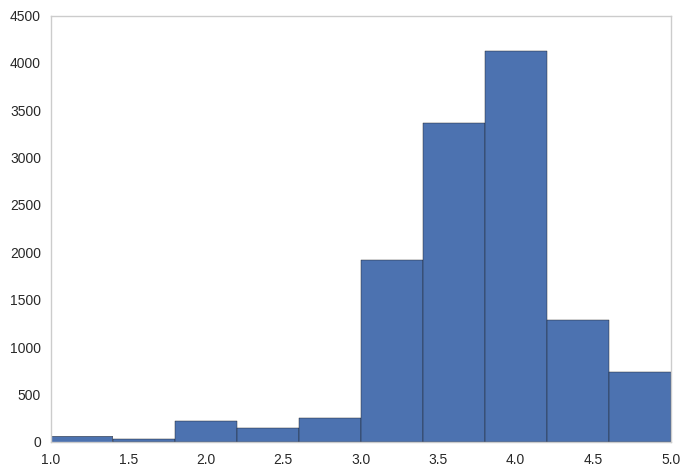

In [119]:
BookInfo.average_rating.hist(grid=False);

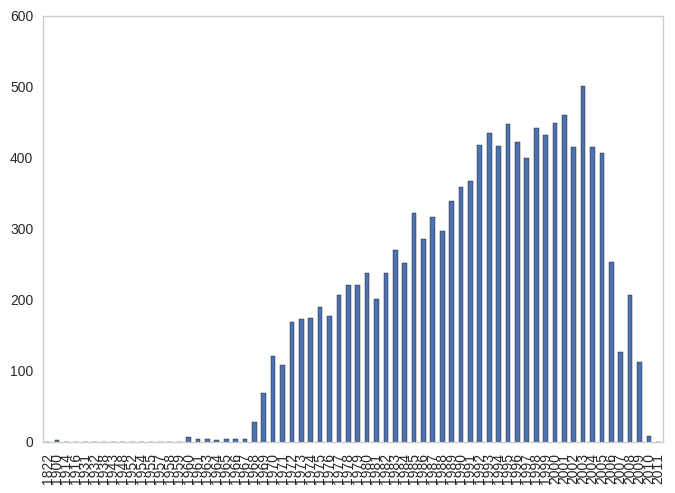

In [118]:
Dates = BookInfo.publish_date.str.findall('\d{4}') # need only the year, some records have the date
gr=pd.Series(data = [term for i in Dates for term in (i if type(i) == list else '' )]).value_counts().sort_index().plot(kind='bar', grid=False)
#sns.barplot(x=gr.index, y=gr.values, label='Number of books each year');

In [ ]:
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

In [105]:
type(Dates[0]) == list

True